<a href="https://colab.research.google.com/github/mahilohiya/WebScraping/blob/main/BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url="https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=python&txtLocation="
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

url="https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=python&txtLocation="
response = requests.get(url)
soup = BeautifulSoup(response.txt, 'html.parser')

In [ ]:
job_list = []
for job in jobs:
    title = job.find('h2').text.strip()
    company = job.find('h3', class_='joblist-comp-name').text.strip()
    skills_element = job.find('span', class_='srp-skills')
    skills = skills_element.text.strip() if skills_element else 'N/A'
    date_posted_element = job.find('span', class_='sim-posted')
    date_posted = date_posted_element.text.strip() if date_posted_element else 'N/A'
    link = job.header.h2.a['href']
    job_list.append([title, company, skills, date_posted, link])

In [ ]:
display(job_list)

[['Python Developer',
  'acquiscent technologies pvt. ltd.',
  'Not Mentioned',
  'https://www.timesjobs.com/job-detail/python-developer-acquiscent-technologies-pvt-ltd-pune-1-to-5-yrs-jobid-ggWz1MWc4X9zpSvf__PLUS__uAgZw==&source=srp'],
 ['Python Developer',
  'geekyworks',
  'Not Mentioned',
  'https://www.timesjobs.com/job-detail/python-developer-geekyworks-pune-2-to-3-yrs-jobid-HtQuUbJGOvJzpSvf__PLUS__uAgZw==&source=srp'],
 ['Python Developer',
  'SEVEN CONSULTANCY',
  'Not Mentioned',
  'https://www.timesjobs.com/job-detail/python-developer-seven-consultancy-navi-mumbai-mumbai-4-to-7-yrs-jobid-VJ3GBkmUwLVzpSvf__PLUS__uAgZw==&source=srp'],
 ['Python Developer',
  'realizer technologies',
  'Not Mentioned',
  'https://www.timesjobs.com/job-detail/python-developer-realizer-technologies-pune-0-to-3-yrs-jobid-F362LGN73BZzpSvf__PLUS__uAgZw==&source=srp'],
 ['Python Developer',
  'virtusa consulting services pvt. ltd.',
  'Not Mentioned',
  'https://www.timesjobs.com/job-detail/python-dev

In [ ]:
df = pd.DataFrame(job_list, columns=['Title', 'Company', 'Skills', 'Link', 'date_posted'])
df.to_csv("jobs.csv", index=False)
print("Scraped", len(df), "jobs and saved to jobs.csv")

Scraped 25 jobs and saved to jobs.csv


In [ ]:
from collections import Counter
all_skills =  "".join(df["Skills"]).lower().replace(',', ' ').split()
skill_counts = Counter(all_skills)
print("Top 10 in-demand skills:")
print(skill_counts.most_common(10))

Top 10 in-demand skills:
[('mentionednot', 24), ('not', 1), ('mentioned', 1)]


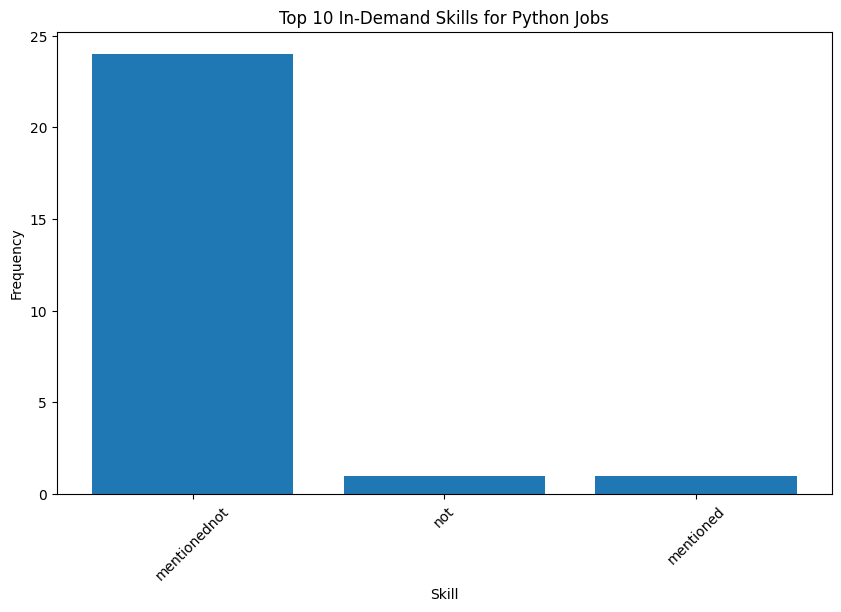

In [ ]:
import matplotlib.pyplot as plt

skills, counts = zip(*skill_counts.most_common(10))
plt.figure(figsize=(10,6))
plt.bar(skills, counts)
plt.title("Top 10 In-Demand Skills for Python Jobs")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()